In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
nMTCD=30000

In [3]:
Grouping_Data = pd.read_csv('/home/kangyu/TDCR/Plotting/data/D2D_Grouping/MTCD_grouping_30000.csv')

In [4]:
Grouping_Data.head()

,MTCD_id,x,y,clusters
0,0,-515.140,350.317,0
1,1,-62.455,-71.412,1
2,2,51.550,474.596,2
3,3,602.994,48.948,3
4,4,-928.978,-170.421,4


In [5]:
size = Grouping_Data.groupby('clusters').size()
print(len(size), np.average(size), min(size), max(size))

219 136.986301369863 55 192


In [6]:
ACB_0_5_data = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/ACB_0.5/ACB_0.5_MTCD_RA_Time_{nMTCD}.csv')
ACB_optimal_data = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/ACB_optimal/ACB_optimal_MTCD_RA_Time_{nMTCD}.csv')
# STD_data = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/STD/ACB_1_Device_Result_{nMTCD}.csv.csv')
D2D_data = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/D2D/D2D_Device_Result_{nMTCD}.csv')

In [7]:
D2D_data.head()

,Header,D2D_success,D2D_transmit,RA_init,RA_success,RA_transmit
0,0,-1,2,229,245,1
1,1,-1,3,394,415,1
2,2,-1,1,688,695,1
3,3,-1,1,693,700,1
4,4,-1,1,714,720,1


In [25]:
STD_data.head()

,RA_init,RA_first,RA_success,RA_transmit
0,336,321,336,2
1,157,157,157,1
2,265,265,265,1
3,367,367,367,1
4,425,408,425,2


In [9]:
# print(len(STD_data.loc[STD_data['RA_success'] == -1]))

print(len(ACB_0_5_data.loc[ACB_0_5_data['RA_success'] == -1]))

print(len(ACB_optimal_data.loc[ACB_optimal_data['RA_success'] == -1]))

print(len(D2D_data.loc[D2D_data['RA_success'] == -1]))

19794
0
326


In [11]:
# STD_sucess = STD_data.loc[(STD_data['RA_success'] != -1)]
ACB_0_5_data = ACB_0_5_data.loc[(ACB_0_5_data['RA_success'] != -1)]
ACB_optimal_data = ACB_optimal_data.loc[(ACB_optimal_data['RA_success'] != -1)]
D2D_data = D2D_data.loc[(D2D_data['RA_success'] != -1)]

In [12]:
# print(np.average(STD_sucess['RA_transmit']))
print(np.average(ACB_0_5_data['RA_transmit']))
print(np.average(ACB_optimal_data['RA_transmit']))
print(np.average(D2D_data['RA_transmit']))

5.045267489711934
1.0
1.0


In [14]:
# print(np.average(STD_sucess['RA_success'] - STD_sucess['RA_first']))
print(np.average(ACB_0_5_data['RA_success'] - ACB_0_5_data['RA_first']))
print(np.average(ACB_optimal_data['RA_success'] - ACB_optimal_data['RA_first']))
print(np.average(D2D_data['RA_success'] - D2D_data['RA_init']))

321.13041348226534
396.61676666666665
83.03096987261576


In [17]:
print(np.average(D2D_data.loc[(D2D_data['D2D_success'] != -1), 'D2D_transmit']))

print(np.average(D2D_data.loc[(D2D_data['D2D_success'] != -1), 'D2D_success'] - D2D_data.loc[(D2D_data['D2D_success'] != -1), 'RA_init']))

1.8582583602104905
10.381089797996944


In [27]:
print(np.max(D2D_data['D2D_success']))

988


In [18]:
ACB_0_5_data.groupby('RA_success').size()

RA_success
8       1
18      1
20      1
22      1
29      1
       ..
1665    1
1666    1
1679    1
1772    1
1811    1
Length: 1169, dtype: int64

Text(0.5, 1.0, 'cumulative number success device with nMTCD = 30000')

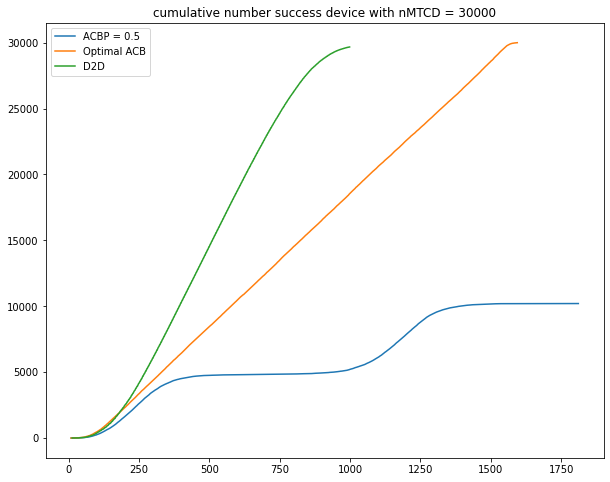

In [20]:
plt.figure(figsize=(10,8))

plt.plot(np.cumsum(ACB_0_5_data.groupby('RA_success').size()), label='ACBP = 0.5', ls='-')
plt.plot(np.cumsum(ACB_optimal_data.groupby('RA_success').size()), label='Optimal ACB')
# plt.plot(np.cumsum(STD_data.groupby('RA_success').size()), label='Standard')
plt.plot(np.cumsum(D2D_data.groupby('RA_success').size()), label='D2D')

plt.legend()
plt.title('cumulative number success device with nMTCD = 30000')